<a href="https://colab.research.google.com/github/likhitha-dhanaraju/smart-assist-chatbot/blob/model_development/03%20Image%20Captioning%20Models/01_Image_Captioning_Mini_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install datasets --upgrade
!pip install transformers --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [1]:
import datasets
import transformers
print(datasets.__version__)
print(transformers.__version__)

2.18.0
4.39.1


In [2]:
from datasets import load_from_disk
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from transformers import BlipForConditionalGeneration

from PIL import Image
import numpy as np
import torch
import os
import torch

In [3]:
root = '/content/drive/MyDrive/03 EDHEC'

In [4]:
train_dataset = load_from_disk(os.path.join(root, 'val_dataset'))
print("Smaller Train Dataset:")
print(train_dataset)

Smaller Train Dataset:
Dataset({
    features: ['image', 'text'],
    num_rows: 183989
})


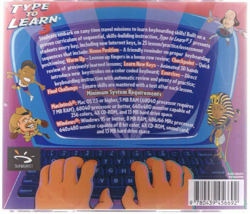

'type to learn 3softwareeducation reference home position friendly reminder on proper keyboarding positioning warmup loosen up fingers in home row review checkpoint quick review of previously learned lessons learn new keys animated 3d hands introduce new keystrokes on color coded keyboard exercise direct keyboarding instruction with automatic reviewi and plenty of practice'

In [5]:
example = train_dataset[0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.5*width), int(0.5*height))))

example["text"]

In [6]:
class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        encoding = self.processor(images=item["image"], text=item["text"], truncation=True, return_tensors="pt" )

        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        return encoding


from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
train_dataset_captioning = ImageCaptioningDataset(train_dataset, processor)

item = train_dataset_captioning[0]
for k,v in item.items():
    print(k,v.shape)

pixel_values torch.Size([3, 384, 384])
input_ids torch.Size([66])
attention_mask torch.Size([66])


In [8]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    attention_masks = [item['attention_mask'] for item in batch]
    pixel_values = torch.stack([item['pixel_values'] for item in batch])

    max_length = max(len(input_ids) for input_ids in batch)

    # Pad sequences to the maximum length within the batch
    input_ids = pad_sequence(input_ids, batch_first=True,  padding_value=max_length)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)

    return {'input_ids': input_ids, 'attention_mask': attention_masks, 'pixel_values': pixel_values}

# Create DataLoader with custom collate function
train_dataloader = DataLoader(train_dataset_captioning, shuffle=True,
                              batch_size=4, collate_fn=collate_fn)

# Iterate over batches
batch = next(iter(train_dataloader))
for k,v in batch.items():
    print(k,v.shape)

input_ids torch.Size([4, 229])
attention_mask torch.Size([4, 229])
pixel_values torch.Size([4, 3, 384, 384])


In [9]:
print(processor.decode(batch["input_ids"][0]))
print(len(batch["input_ids"][0]))

[CLS] ugg unisexchild classic ultra mini fashion bootclothing shoes jewelrygirlsshoesboots17mm twinface sheepskin uppermedial zipper17mm sheepskin lining17mm uggplush 60 upcycled wool 40 lyocell insolesugarsole eva outsole [SEP] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [unused2] [

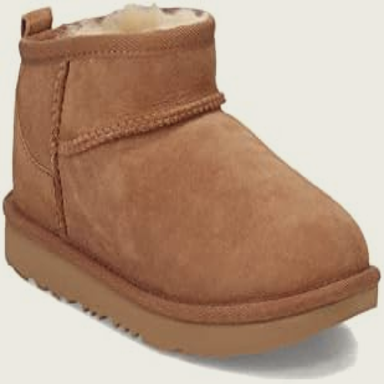

In [10]:
MEAN = np.array([123.675, 116.280, 103.530]) / 255
STD = np.array([58.395, 57.120, 57.375]) / 255

unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [11]:
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [12]:
outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss

tensor(11.6784, grad_fn=<NllLossBackward0>)

#### IF USING TPU

In [ ]:
pip install torch~=2.2.0 torch_xla[tpu]~=2.2.0 -f https://storage.googleapis.com/libtpu-releases/index.html

Looking in links: https://storage.googleapis.com/libtpu-releases/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch_xla.core.xla_model as xm

xm.xla_device()

device = xm.xla_device()

print(device)

xla:0


#### NEXT STEP

In [14]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

model.to(device)

model.train()
losses = []

for epoch in range(10):
    print("Epoch:", epoch)
    epoch_losses = []  # Store losses for this epoch
    for idx, batch in tqdm(enumerate(train_dataloader)):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)

        outputs = model(input_ids=input_ids,
                        pixel_values=pixel_values,
                        labels=input_ids)

        loss = outputs.loss
        epoch_losses.append(loss.item())  # Append loss for this batch
        # print("Loss:", loss.item())

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    # Calculate average loss for this epoch
    avg_epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(avg_epoch_loss)  # Append average loss for this epoch
    print("Average Loss for Epoch {}: {}".format(epoch, avg_epoch_loss))

# Plot the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


Epoch: 0


46it [00:52,  1.36s/it]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
842it [15:12,  1.07s/it]

In [ ]:
# Save the model

save_path = '/content/drive/MyDrive/03 EDHEC/saved_models_version_3_mini_dataset/'

if not os.path.exists(save_path):
    os.mkdir(save_path)

model.save_pretrained(save_path)
processor.save_pretrained(save_path)

## Inference

In [ ]:
saved_processor = AutoProcessor.from_pretrained(save_path)
saved_model = BlipForConditionalGeneration.from_pretrained(save_path).to(device)

image = train_dataset[30000]['image']
question = ""
inputs = saved_processor(image, question, return_tensors="pt").to(device)

out = saved_model.generate(**inputs)
print(saved_processor.decode(out[0], skip_special_tokens=True))

### Training with validation dataset

In [ ]:
import matplotlib.pyplot as plt

model.to(device)

train_losses = []
val_losses = []

for epoch in range(10):
    print("Epoch:", epoch)

    # Training Phase
    model.train()
    epoch_train_losses = []  # Store training losses for this epoch
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)

        outputs = model(input_ids=input_ids,
                        pixel_values=pixel_values,
                        labels=input_ids)

        loss = outputs.loss
        epoch_train_losses.append(loss.item())  # Append loss for this batch

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Calculate average training loss for this epoch
    avg_train_loss = sum(epoch_train_losses) / len(epoch_train_losses)
    train_losses.append(avg_train_loss)  # Append average training loss for this epoch
    print("Average Training Loss for Epoch {}: {}".format(epoch, avg_train_loss))

    # Validation Phase
    model.eval()
    with torch.no_grad():
        epoch_val_losses = []  # Store validation losses for this epoch
        for idx, batch in enumerate(val_dataloader):
            input_ids = batch.pop("input_ids").to(device)
            pixel_values = batch.pop("pixel_values").to(device)

            outputs = model(input_ids=input_ids,
                            pixel_values=pixel_values,
                            labels=input_ids)

            loss = outputs.loss
            epoch_val_losses.append(loss.item())  # Append loss for this batch

        # Calculate average validation loss for this epoch
        avg_val_loss = sum(epoch_val_losses) / len(epoch_val_losses)
        val_losses.append(avg_val_loss)  # Append average validation loss for this epoch
        print("Average Validation Loss for Epoch {}: {}".format(epoch, avg_val_loss))

# Plot the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


In [ ]:
# Evaluate on Test Data
model.eval()
test_losses = []
with torch.no_grad():
    for idx, batch in enumerate(test_dataloader):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)

        outputs = model(input_ids=input_ids,
                        pixel_values=pixel_values,
                        labels=input_ids)

        loss = outputs.loss
        test_losses.append(loss.item())  # Append loss for this batch

# Calculate average test loss
avg_test_loss = sum(test_losses) / len(test_losses)
print("Average Test Loss: {}".format(avg_test_loss))